In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
import tensorflow as tf
from model import FloWaveNet
from hparams import hparams
import numpy as np
import audio 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with tf.variable_scope('vocoder'):
        z = tf.placeholder(tf.float32, shape=[None, None, 1], name='z')
        lc = tf.placeholder(tf.float32, shape=[None, None, hparams.num_mels])

        model = FloWaveNet(in_channel=1,
                           cin_channel=hparams.num_mels,
                           n_block=hparams.n_block,
                           n_flow=hparams.n_flow,
                           n_layer=hparams.n_layer,
                           affine=hparams.affine,
                           causal=hparams.causality, scope='FloWaveNet')

        predictions = model.reverse(z, lc)

In [4]:
sess = tf.Session()
saver = tf.train.Saver()

saver.restore(sess, 'logs/pretrained/flowavenet_model.ckpt-14000')

INFO:tensorflow:Restoring parameters from logs/pretrained/flowavenet_model.ckpt-14000


In [5]:
_lc = np.load('training_data/dataset-mel-11879.npy')

In [6]:
_z = np.random.normal(size=(1, _lc.shape[0] * audio.get_hop_size(hparams), 1)) * 0.8

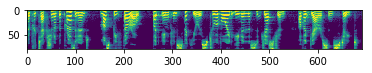

In [7]:

plt.imshow(_lc.T)

In [11]:
%%time
result = sess.run(predictions, feed_dict={z: _z, lc: _lc[np.newaxis, ...]})
# result = audio.inv_preemphasis(np.squeeze(result), 0.97, True)
result = np.squeeze(result)
audio.save_wav(result, 'tmp.wav', hparams.sample_rate)

CPU times: user 616 ms, sys: 280 ms, total: 896 ms
Wall time: 836 ms


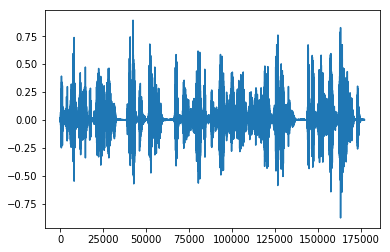

In [12]:
plt.plot(result)

In [13]:
import IPython.display as ipd

In [14]:
ipd.Audio(result, rate=hparams.sample_rate)

In [13]:
data = np.load('training_data/dataset-audio-00010.npy')
data = audio.inv_preemphasis(data, 0.97, True)

ipd.Audio(data, rate=hparams.sample_rate)

In [ ]:
act_norm_vars = [var for var in tf.trainable_variables() if 'ActNorm' in var.name]

In [14]:
_act_norm_vars = sess.run(act_norm_vars)

In [30]:
with open('training_data/train.txt', 'rt', encoding='utf-8') as meta:
    meta = meta.read().strip().split('\n')
    meta = [m.split('|') for m in meta]

In [34]:
for audio, mel, _, _ in meta:
    audio = np.load('training_data/' + audio)
    mel = np.load('training_data/' + mel)
    if abs(audio.mean()) > 0.2 or audio.max() > 1 or audio.min() < -1:
        print(audio.mean(), audio.max(), audio.min())
        print(mel.mean(), mel.max(), mel.min())
        break

In [16]:
%%time
1 + 2

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.53 µs


3